<h1><b>Project : Voter Turnout Prediction for 2014 Election</b></h1>

    -Done By: Sherwyn Tristen Diogo Misquitta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('voterfile .csv')
df.head(3)

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,income,education,cd,dma,...,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,American Independent,European,NaN,NaN,Unknown,NaN,2.0,RENO DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,Non-Partisan,European,NaN,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.49,0.34,0.70,0.04,0.09,0.06


<h1><b>Exploratory Data Analysis</h1></b>

In [ ]:
df.shape

(50000, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   optimus_id                        50000 non-null  int64  
 1   age                               49983 non-null  float64
 2   party                             50000 non-null  object 
 3   ethnicity                         44808 non-null  object 
 4   maritalstatus                     19362 non-null  object 
 5   dwellingtype                      23917 non-null  object 
 6   income                            50000 non-null  object 
 7   education                         27590 non-null  object 
 8   cd                                49996 non-null  float64
 9   dma                               50000 non-null  object 
 10  occupationindustry                8192 non-null   object 
 11  vh14p                             50000 non-null  int64  
 12  vh12

In [ ]:
df.describe()

,optimus_id,age,cd,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,...,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
count,5.000000e+04,49983.000000,49996.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,5.531076e+05,51.416402,2.582147,0.087500,0.26390,0.118340,0.431600,0.145080,0.355020,0.17798,...,0.741020,0.153720,0.472920,0.186920,0.620372,0.524364,0.742452,0.134266,0.232660,0.155691
std,3.195294e+05,18.066456,1.071404,0.282569,0.44075,0.323014,0.495304,0.352185,0.478524,0.38250,...,0.438079,0.360684,0.499271,0.389851,0.110721,0.130441,0.093793,0.078602,0.112521,0.085376
min,2.100000e+01,19.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,2.773910e+05,36.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.550000,0.430000,0.690000,0.080000,0.150000,0.100000
50%,5.519550e+05,52.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.630000,0.530000,0.750000,0.120000,0.210000,0.130000
75%,8.310178e+05,65.000000,4.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.00000,...,1.000000,0.000000,1.000000,0.000000,0.700000,0.620000,0.810000,0.170000,0.300000,0.190000
max,1.105934e+06,100.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4>Field	Description</h4>
<b>optimus_id:</b> Unique id assigned to each person </br>
<b>age:</b>	Age of registered voter</br>
<b>party:</b>	Registered political party</br>
<b>ethnicity:</b>	Modeled ethnicity</br>
<b>marital:</b>	Modeled marital status</br>
<b>dwellingtype:</b>	Dwelling type</br>
<b>education:</b>	Modeled education (commercial data)</br>
<b>cd:</b>	Congressional district (geography)</br>
<b>dma:</b>	Designated market area (geography)</br>
<b>occupationindustry:</b>	Modeled occupational industry (commercial data)</br>
<b>net_worth:</b>	Net worth (commercial data)</br>
<b>intrst_nascar_in_hh:</b>	Individual interested in NASCAR in household (commercial data)</br>
<b>petowner_dog:</b>	Likely to own a dog (commercial data)</br>
<b>intrst_musical_instruments_in_hh:</b>	Individual with musical interests in household (commercial data)</br>
<b>donates_to_liberal_causes:</b>	Donates to liberal causes (commercial data)</br>
<b>home_owner_or_renter:</b>	Homeowner or renter (commercial data)
</br>

In [ ]:
columns=df.filter(regex='^v')
print(columns)


       vh14p  vh12g  vh12p  vh10g  vh10p  vh08g  vh08p  vh06g  vh06p  vh04g  \
0          0      0      0      1      0      1      0      1      0      1   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      1      0      1   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      1      0      1      1      1      1      1   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995      0      0      0      0      0      0      0      0      0      0   
49996      0      0      0      0      0      0      0      0      0      0   
49997      0      0      0      0      0      0      0      0      0      0   
49998      0      0      1      1      1      0      0      1      0      1   
49999      0      0      0      0      0      0      0      0      0      0   

       vh04p  vh02g  vh02p  vh00g  vh00p  
0       

So we have

**vh14:**  2014  primary </br>
**vh12:**  2012  general and primary </br>
**vh10:**  2010  general and primary </br>
**vh08:**  2008  general and primary </br>
**vh06:**  2006  general and primary </br>
**vh04:**  2004  general and primary </br>
**vh02:**  2002  general and primary </br>
**vh00:**  2000  general and primary

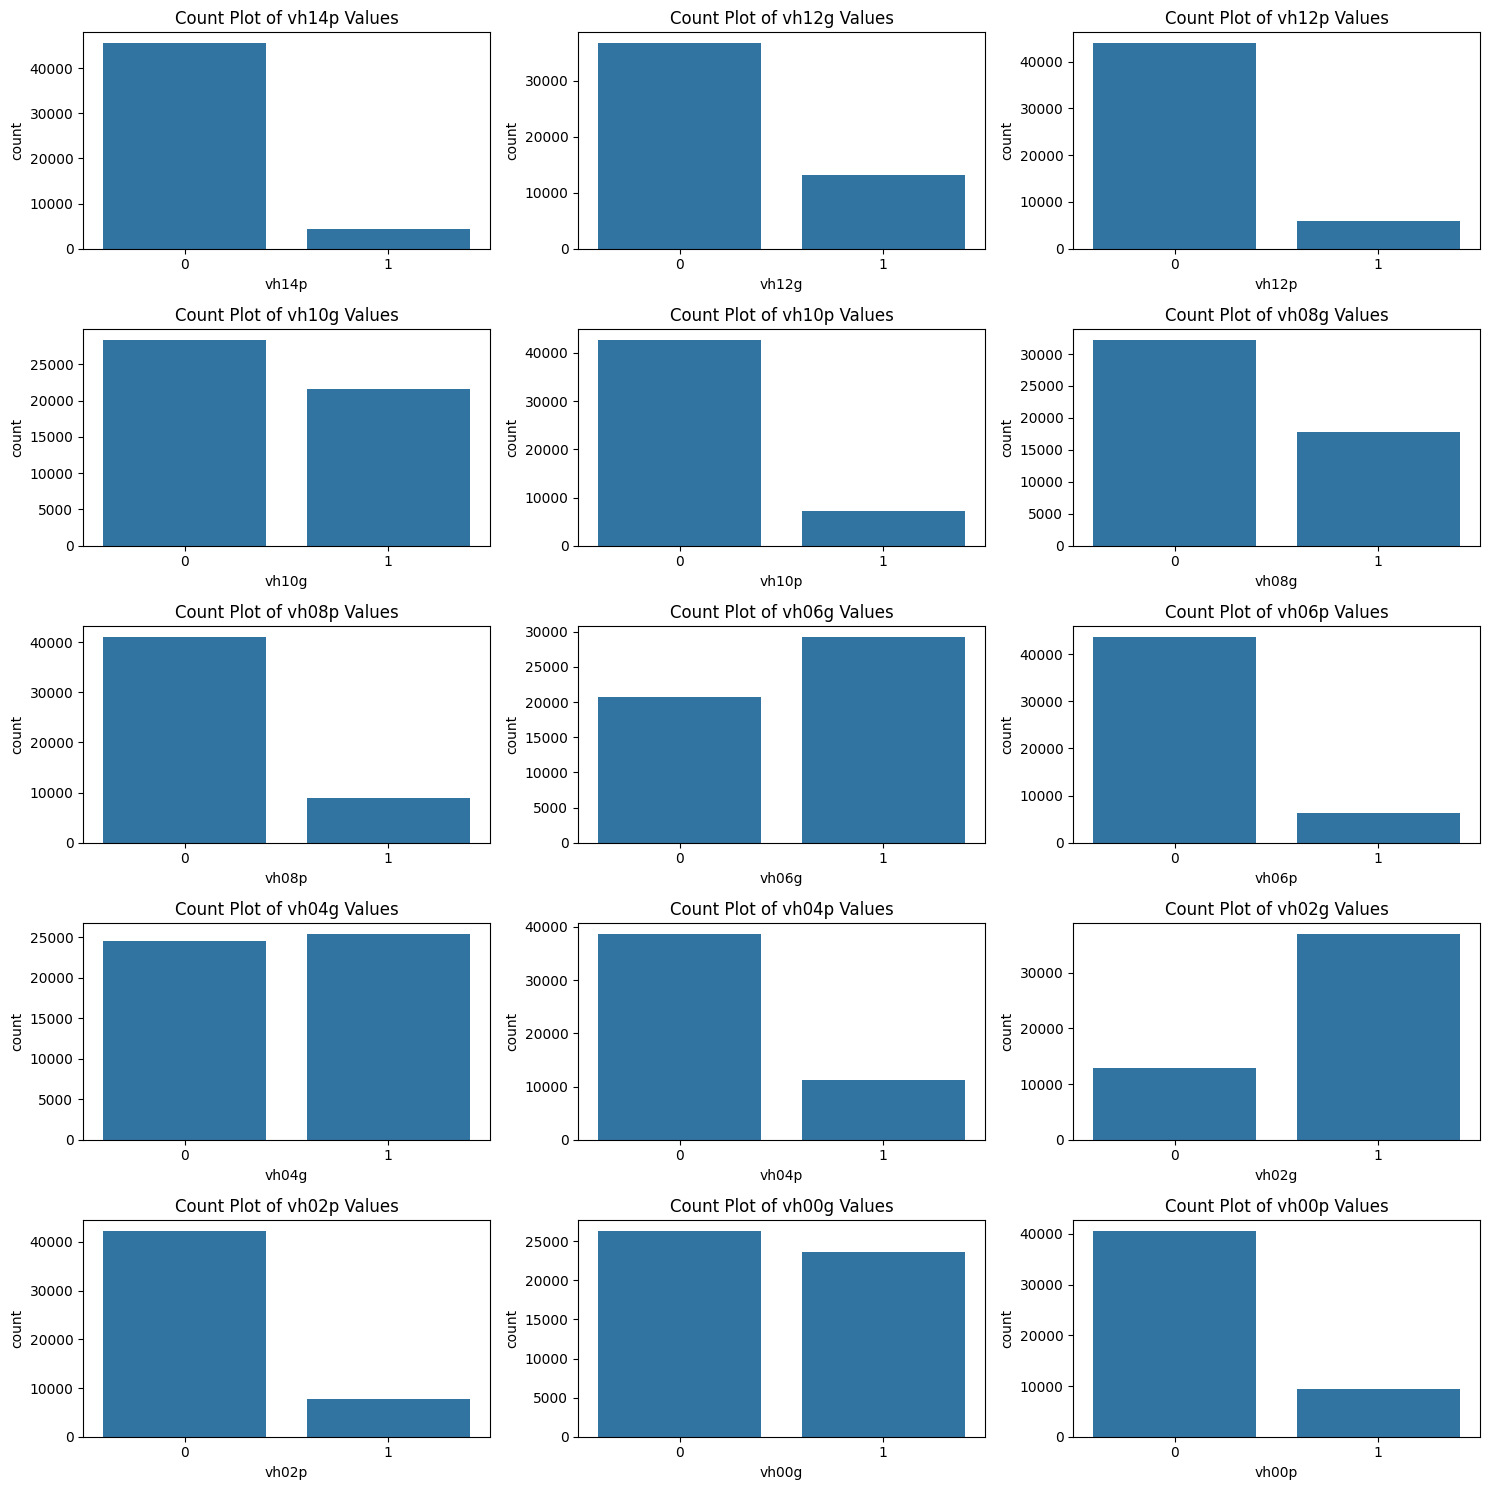

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
for i, col in enumerate(df.filter(like='vh').columns):
    row=i//3
    column_index=i%3
    sns.countplot(x=col,data=df,ax=axs[row,column_index])
    axs[row, column_index].set_title(f'Count Plot of {col} Values')
plt.tight_layout()
plt.show()

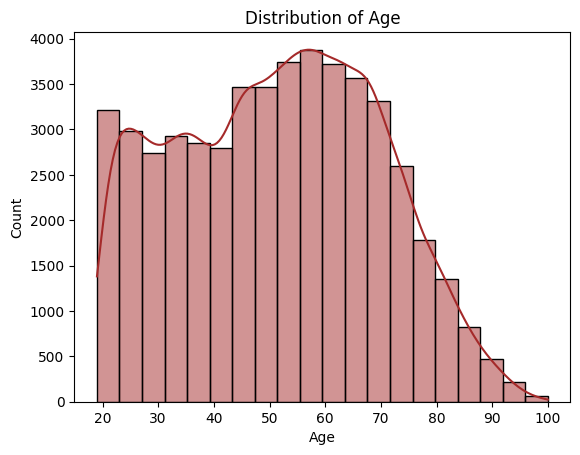

In [ ]:
sns.histplot(data=df,x='age',bins=20,kde=True,color='brown')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

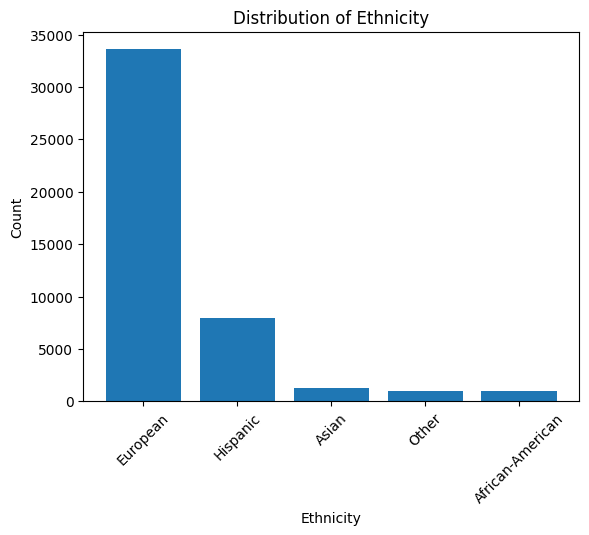

In [ ]:
ethnicity=df['ethnicity'].value_counts()
plt.bar(ethnicity.index, ethnicity)
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<h1><b>Handling Inconsistent Values</b.</h1>

In [ ]:
income_range=["0-35k","35k-75k","75k-125k","125k-200k","200k+","unknown"]

In [ ]:
# Stripping the special characters
def calc_median_income(income_range):
    '''
    Calculate median income from income range

    '''

    if "+" in income_range:
      lower,_ = income_range.split("k+")
      lower=int(lower)*1000
      upper=100000 #  any large value
    elif "-" in income_range:
      lower, upper =income_range.split("-")
      lower=int(lower.replace("k",""))*1000
      upper=int(upper.replace("k",""))*1000
    else:
        return 'unknown'
    median =(lower+upper) // 2
    return median


In [ ]:
df['income']=[calc_median_income(income) for income in df['income']]

In [ ]:
df['income'].value_counts()

,count
income,
unknown,19601
55000,11435
100000,9414
17500,4186
162500,3689
150000,1675


In [ ]:
# Manually done after taking a look at the data
#
filtered_df=df[(df['age']>30) & (df['net_worth']=='$499999+')]
print(len(filtered_df))
df.loc[(df['age']>=30)&(df['net_worth']=='$499999+')&(df['income']=='unknown'),'income']=162500

2705


In [ ]:
filtered_df=df[(df['age']>30) & (df['net_worth']=='$250000-499999')]
print(len(filtered_df))
df.loc[(df['age']>=30)&(df['net_worth']=='$250000-499999')&(df['income']=='unknown'),'income']=100000

6784


In [ ]:
filtered_df=df[(df['age']>30) & (df['net_worth']=='$100000-249999')]
print(filtered_df[['age','income','net_worth']])
half_index=filtered_df.sample(frac=0.5).index
df.loc[half_index,'income']=100000
df.loc[filtered_df.index.difference(half_index),'income']=55000

        age  income       net_worth
0      69.0  100000  $100000-249999
8      53.0   55000  $100000-249999
21     67.0   55000  $100000-249999
22     65.0  100000  $100000-249999
25     44.0  100000  $100000-249999
...     ...     ...             ...
49954  69.0  100000  $100000-249999
49959  63.0   55000  $100000-249999
49963  65.0  100000  $100000-249999
49971  40.0  100000  $100000-249999
49991  52.0  100000  $100000-249999

[8814 rows x 3 columns]


checkpoint

In [ ]:
filtered_df=df[(df['age']>30) & (df['net_worth']=='$50000-99999')]
print(filtered_df[['age','income','net_worth']])
df.loc[(df['age']>=30)&(df['net_worth']=='$50000-99999')&(df['income']=='unknown'),'income']=55000

        age   income     net_worth
66     83.0    17500  $50000-99999
76     66.0    17500  $50000-99999
115    78.0  unknown  $50000-99999
119    55.0   100000  $50000-99999
176    56.0    55000  $50000-99999
...     ...      ...           ...
49810  66.0    17500  $50000-99999
49837  76.0    55000  $50000-99999
49932  65.0    55000  $50000-99999
49957  59.0  unknown  $50000-99999
49966  59.0   100000  $50000-99999

[1277 rows x 3 columns]


In [ ]:
filtered_df=df[(df['age']>30) & (df['net_worth']=='$100000-249999')& (df['income']==55000)]
print(len(filtered_df))
df.loc[(df['age']>=30)&(df['net_worth']=='$100000-249999')&(df['income']=='unknown'),'income']=55000
df.loc[(df['age']<30)&(df['net_worth']=='$100000-249999')&(df['income']=='unknown'),'income']=17500

4407


In [ ]:
df['income'].value_counts()

,count
income,
unknown,18088
55000,12684
100000,11208
17500,3636
162500,2995
150000,1389


In [ ]:
# For the remaining unknown values , Split the rows having 'unknown' into 4 parts
unknowns_i_rows=df[df['income']=='unknown']
rows=len(unknowns_i_rows)
nums_per_grp=rows//4
income_values=[100000,55000,162500,150000]
for i in range(4):
    start_index=i*nums_per_grp
    end_index=(i+1)*nums_per_grp
    df.loc[unknowns_i_rows.index[start_index:end_index],'income']=income_values[i]
df['income'].value_counts()

,count
income,
55000,17206
100000,15730
162500,7517
150000,5911
17500,3636


In [ ]:
#df[(df['age'].isnull())& (df['income']==162500)]
df.loc[(df['age'].isnull()) & (df['income']>=100000),'age'] = df['age'].median()

In [ ]:
df['cd'].dropna(inplace=True)
df['dma'].dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
optimus_id,0
age,4
party,0
ethnicity,5192
maritalstatus,30638
dwellingtype,26083
income,0
education,22410
cd,4
dma,0


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

<ipython-input-46-bc8dbcfd9072>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [ ]:
df['cd'].fillna(df['cd'].median(),inplace=True)

<ipython-input-47-525b26431d57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cd'].fillna(df['cd'].median(),inplace=True)


In [ ]:
#Ordering is irrelevant hence Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoder_party_col=encoder.fit_transform(df[['party']])
encoded_df=pd.DataFrame(encoder_party_col,columns=encoder.get_feature_names_out(['party']))
df=pd.concat([df,encoded_df],axis=1)
df.drop('party',axis=1,inplace=True)


In [ ]:
features = ['age', 'income','party_Democratic','cd','party_Non-Partisan','party_Republican']

In [ ]:
features

['age',
 'income',
 'party_Democratic',
 'cd',
 'party_Non-Partisan',
 'party_Republican']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
df['income']=mm.fit_transform(df['income'].values.reshape(-1,1))


In [ ]:
df['income'].describe()

,income
count,50000.000000
mean,0.526362
std,0.311224
min,0.000000
25%,0.258621
50%,0.568966
75%,0.913793
max,1.000000


In [ ]:
# Took the mean of all the election results and fixed a threshold
df['predicting_vh14g']=(df[['vh14p','vh12p','vh10p','vh08p','vh06p','vh04p','vh02p','vh00p','vh12g','vh10g','vh08g','vh06g','vh04g','vh02g','vh00g']].mean(axis=1)>=0.5).astype(int)

In [ ]:
Y=df['predicting_vh14g']=df['predicting_vh14g'].astype(int)

In [ ]:
df['predicting_vh14g'].value_counts(normalize=True)

,proportion
predicting_vh14g,
0,0.77114
1,0.22886


<h1><b>Splitting the Dataset</b></h1>

In [ ]:
X=df[features]
print(X)
print(Y)

        age    income  party_Democratic   cd  party_Non-Partisan  \
0      69.0  0.258621               0.0  4.0                 0.0   
1      20.0  0.568966               0.0  2.0                 0.0   
2      28.0  0.568966               0.0  3.0                 1.0   
3      78.0  0.568966               0.0  3.0                 0.0   
4      68.0  0.568966               1.0  4.0                 0.0   
...     ...       ...               ...  ...                 ...   
49995  23.0  1.000000               0.0  3.0                 0.0   
49996  24.0  0.258621               1.0  1.0                 0.0   
49997  28.0  0.258621               0.0  1.0                 1.0   
49998  49.0  0.568966               0.0  4.0                 0.0   
49999  69.0  0.258621               0.0  2.0                 0.0   

       party_Republican  
0                   1.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
4

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

<h1><b>Model Building</b></h1>

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
def objective(trial):
        params =  {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000,
                                          step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,10)
          }
        xgb_model = xgb.XGBClassifier(**params,use_label_encoder=False, eval_metric='logloss')
        return cross_val_score(xgb_model,X_train,Y_train,cv=5).mean()
learning=optuna.create_study(direction='maximize')
learning.optimize(objective,n_trials=10)

[I 2024-11-15 08:48:29,071] A new study created in memory with name: no-name-45fa6e30-a936-4ff7-b178-12adfd87370d
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:41] WARNING: /workspace/src/learner.cc:740: 
P

In [ ]:
best_params=learning.best_params
print(best_params)

{'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.03848047596032133, 'subsample': 0.5904833040084074, 'colsample_bytree': 0.7108944060769855, 'min_samples_split': 9, 'min_samples_leaf': 6}


In [ ]:
final_xgb_model=xgb.XGBClassifier(**best_params,use_label_encoder=False,eval_metric='logloss')
final_xgb_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7108944060769855, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03848047596032133,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=9,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=400, n_jobs=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix
y_pred=final_xgb_model.predict(X_test)
Y_pred_prob=final_xgb_model.predict_proba(X_test)[:,1]

#Evaluation
accuracy=accuracy_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
auc=roc_auc_score(Y_test,Y_pred_prob)

print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')
print(f'AUC: {auc:.4}')

Accuracy: 0.7892
Precision: 0.5705
Recall: 0.2787
F1 Score: 0.3745
AUC: 0.8043


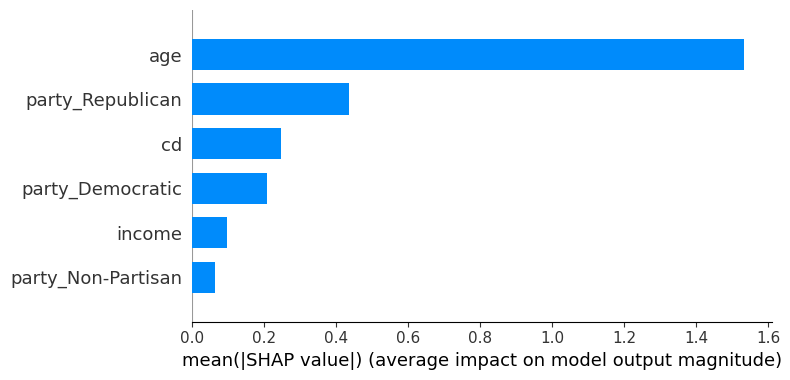

In [ ]:
import shap

explainer=shap.TreeExplainer(final_xgb_model)
shap_values=explainer.shap_values(X_test)

shap.summary_plot(shap_values,X_test,plot_type='bar')

In [ ]:
'''
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

X_poly=poly.fit_transform(X)

X_poly_df=pd.DataFrame(X_poly,columns=poly.get_feature_names_out(features))

X_train_poly,X_test_poly,Y_train_poly,Y_test_poly=train_test_split(X_poly_df,Y,test_size=0.2,random_state=42)
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\npoly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)\n\nX_poly=poly.fit_transform(X)\n\nX_poly_df=pd.DataFrame(X_poly,columns=poly.get_feature_names_out(features))\n\nX_train_poly,X_test_poly,Y_train_poly,Y_test_poly=train_test_split(X_poly_df,Y,test_size=0.2,random_state=42)\n'

In [ ]:
'''y_pred=final_xgb_model.predict(X_test)
Y_pred_prob=final_xgb_model.predict_proba(X_test)[:,1]

accuracy=accuracy_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
auc=roc_auc_score(Y_test,Y_pred_prob)

print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')
print(f'AUC: {auc:.4}')
'''

"y_pred=final_xgb_model.predict(X_test)\nY_pred_prob=final_xgb_model.predict_proba(X_test)[:,1]\n\naccuracy=accuracy_score(Y_test,y_pred)\nprecision=precision_score(Y_test,y_pred)\nrecall=recall_score(Y_test,y_pred)\nf1=f1_score(Y_test,y_pred)\nauc=roc_auc_score(Y_test,Y_pred_prob)\n\nprint(f'Accuracy: {accuracy:.4}')\nprint(f'Precision: {precision:.4}')\nprint(f'Recall: {recall:.4}')\nprint(f'F1 Score: {f1:.4}')\nprint(f'AUC: {auc:.4}')\n"

<h1><b>Tesing</b></h1>

In [ ]:
vote = final_xgb_model.predict(X_test)
vote_prob = final_xgb_model.predict_proba(X_test)[:, 1]

output = X_test.copy()
output['vote'] = vote
output['vote_probability'] =vote_prob
output.to_csv('output.csv', index=False)

print("CSV file")

CSV file


In [ ]:
new_df=pd.read_csv('output.csv')
new_df['vote'].value_counts()

,count
vote,
0,8894
1,1106


In [ ]:
'''
def objective_ply(trial):
  params={
      'n_estimators':trial.suggest_int('n_estimators',100,1000,step=100),
      'max_depth':trial.suggest_int('max_depth',3,10),
      'learning_rate':trial.suggest_float('learning_rate',0.001,0.1),
      'subsample':trial.suggest_float('subsample',0.5,1.0),
      'colsample_bytree':trial.suggest_float('colsample_bytree',0.5,1.0),
      'min_samples_split':trial.suggest_int('min_samples_split',2,10),
      'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10)
  }
  xgb_model=xgb.XGBClassifier(**params,use_label_encoder=False,eval_metric='logloss')

  return cross_val_score(xgb_model,X_train_poly,Y_train_poly,cv=5).mean()
  '''

"\ndef objective_ply(trial):\n  params={\n      'n_estimators':trial.suggest_int('n_estimators',100,1000,step=100),\n      'max_depth':trial.suggest_int('max_depth',3,10),\n      'learning_rate':trial.suggest_float('learning_rate',0.001,0.1),\n      'subsample':trial.suggest_float('subsample',0.5,1.0),\n      'colsample_bytree':trial.suggest_float('colsample_bytree',0.5,1.0),\n      'min_samples_split':trial.suggest_int('min_samples_split',2,10),\n      'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10)\n  }\n  xgb_model=xgb.XGBClassifier(**params,use_label_encoder=False,eval_metric='logloss')\n\n  return cross_val_score(xgb_model,X_train_poly,Y_train_poly,cv=5).mean()\n  "

In [ ]:
'''
learning_poly=optuna.create_study(direction='maximize')
learning_poly.optimize(objective_ply,n_trials=20)
'''

"\nlearning_poly=optuna.create_study(direction='maximize')\nlearning_poly.optimize(objective_ply,n_trials=20)\n"

In [ ]:
'''best_params_poly=learning_poly.best_params
print(best_params_poly)'''

'best_params_poly=learning_poly.best_params\nprint(best_params_poly)'

In [ ]:
'''final_xgb_model_poly=xgb.XGBClassifier(**best_params_poly,use_label_encoder=False,eval_metric='logloss')
final_xgb_model_poly.fit(X_train_poly,Y_train_poly)'''

"final_xgb_model_poly=xgb.XGBClassifier(**best_params_poly,use_label_encoder=False,eval_metric='logloss')\nfinal_xgb_model_poly.fit(X_train_poly,Y_train_poly)"

In [ ]:
'''y_pred_poly=final_xgb_model_poly.predict(X_test_poly)
Y_pred_prob_poly=final_xgb_model_poly.predict_proba(X_test_poly)[:,1]

accuracy_poly=accuracy_score(Y_test_poly,y_pred_poly)
precision_poly=precision_score(Y_test_poly,y_pred_poly)
recall_poly=recall_score(Y_test_poly,y_pred_poly)
f1_poly=f1_score(Y_test_poly,y_pred_poly)
auc_poly=roc_auc_score(Y_test_poly,Y_pred_prob_poly)

print(f'Accuracy: {accuracy_poly:.4}')
print(f'Precision: {precision_poly:.4}')
print(f'Recall: {recall_poly:.4}')
print(f'F1 Score: {f1_poly:.4}')'''

"y_pred_poly=final_xgb_model_poly.predict(X_test_poly)\nY_pred_prob_poly=final_xgb_model_poly.predict_proba(X_test_poly)[:,1]\n\naccuracy_poly=accuracy_score(Y_test_poly,y_pred_poly)\nprecision_poly=precision_score(Y_test_poly,y_pred_poly)\nrecall_poly=recall_score(Y_test_poly,y_pred_poly)\nf1_poly=f1_score(Y_test_poly,y_pred_poly)\nauc_poly=roc_auc_score(Y_test_poly,Y_pred_prob_poly)\n\nprint(f'Accuracy: {accuracy_poly:.4}')\nprint(f'Precision: {precision_poly:.4}')\nprint(f'Recall: {recall_poly:.4}')\nprint(f'F1 Score: {f1_poly:.4}')"

In [ ]:
'''from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,Y_train)

Y_pred_reg=ridge_model.predict(X_test)'''


'from sklearn.linear_model import Ridge\nridge_model=Ridge(alpha=0.1)\nridge_model.fit(X_train,Y_train)\n\nY_pred_reg=ridge_model.predict(X_test)'

In [ ]:
'''from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix
Y_pred_reg=np.where(Y_pred_reg>=0.5,1,0)
print(confusion_matrix(Y_test,Y_pred_reg))
accuracy=accuracy_score(Y_test,Y_pred_reg)
precision=precision_score(Y_test,Y_pred_reg)
recall=recall_score(Y_test,Y_pred_reg)
f1=f1_score(Y_test,Y_pred_reg)
auc=roc_auc_score(Y_test,Y_pred_reg)

print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')
print(f'AUC: {auc:.4}')




'''



"from sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix\nY_pred_reg=np.where(Y_pred_reg>=0.5,1,0)\nprint(confusion_matrix(Y_test,Y_pred_reg))\naccuracy=accuracy_score(Y_test,Y_pred_reg)\nprecision=precision_score(Y_test,Y_pred_reg)\nrecall=recall_score(Y_test,Y_pred_reg)\nf1=f1_score(Y_test,Y_pred_reg)\nauc=roc_auc_score(Y_test,Y_pred_reg)\n\nprint(f'Accuracy: {accuracy:.4}')\nprint(f'Precision: {precision:.4}')\nprint(f'Recall: {recall:.4}')\nprint(f'F1 Score: {f1:.4}')\nprint(f'AUC: {auc:.4}')\n\n\n\n\n"